# Social Media Influencers Analysis Project

### Introduction
In today's digital age, social media influencers have become an integral part of online marketing strategies. These individuals, with their vast reach and strong connection to their followers, play a pivotal role in shaping consumer behavior. From celebrities who have massive global followings to niche content creators who cater to a specific audience, influencers span across a broad spectrum. This project aims to delve deep into the world of social media influencers, analyzing various facets of their online presence and their impact on the digital landscape.

![cover](https://i.postimg.cc/59FVD222/social-media-influencers-2l4ues9.png)


Influencers can be categorized into different tiers based on their follower count:

**Mega-Influencers:** Have millions of followers, often celebrities.

**Macro-Influencers:** Have hundreds of thousands of followers.

**Micro-Influencers:** Have tens of thousands to a hundred thousand followers, often specialize in a niche.

**Nano-Influencers:** Have fewer than 10,000 followers, but usually have a very engaged and loyal following.

### Importance for Businesses

With the growing trend of ad-block usage and general ad fatigue among consumers, traditional advertising channels are becoming less effective. As a result, businesses are turning towards influencers to amplify their marketing reach. Influencers not only bring in their large follower base but also add a layer of trust and personal connection that traditional advertising often lacks.

### Research Focus
In this project, we aim to analyze influencers across multiple dimensions to help businesses make informed decisions. We are using a dataset available on Kaggle, which contains information on the top 1000 social media channels across various platforms. [Dataset Link](https://www.kaggle.com/datasets/ramjasmaurya/top-1000-social-media-channels)

The key areas of focus for this project are:

**1. Influencer Categorization**

Classify influencers into their respective tiers based on their follower count.

**2. Engagement Analysis**

Examine which social media platform has the most engagement and investigate the types of influencers that generate the most engagement.

**3. Category Analysis**

Identify which categories or niches are most popular among influencers across different platforms.

**4. Audience Geography**

Explore where the majority of the audience for these influencers reside, providing insights into market segmentation.

**5. Matching Product Personality**

Recommend influencers that align well with a given product's type and personality, ensuring a successful marketing campaign.

In [1]:
#let's import the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tiktok = pd.read_csv('social media influencers - tiktok.csv')
insta = pd.read_csv('social media influencers - instagram.csv')
yt = pd.read_csv('social media influencers - youtube.csv')

Let's start with data cleaning. Here are the steps we'll take:

1. Identify and handle missing values.
2. Convert numerical data that's currently in string format to actual numerical types.
3. Standardize the units for all numerical columns.

## Step 1: Identify and Handle Missing Values

### Instagram:
First, rename the columns and then let's check for missing values in the instagram dataset.

In [3]:
insta.rename({'category_1':'Category','Audience country(mostly)':'Audience Country', "Authentic engagement\r\n": "Authentic engagement","Engagement avg\r\n":"Engagement avg" },axis=1,inplace=True)

In [4]:
# Check for missing values in the dataset
insta.isnull().sum()

Influencer insta name      0
instagram name            21
Category                 108
category_2               713
Followers                  0
Audience Country          14
Authentic engagement       0
Engagement avg             0
dtype: int64

For handling missing values, we have several options:

1. For `instagram name` and `Audience country(mostly)`: We could remove rows with missing values, or fill them with a placeholder like "Unknown".

2. `For category_1 and category_2`: Since these are categorical data, we could fill missing values with a placeholder like "Unknown" or the most frequent category.

In [5]:
# Remove rows with missing values in 'instagram name' and 'Audience country(mostly)'
insta = insta.dropna(subset=['instagram name', 'Audience Country'])

In [6]:
# Fill missing values in 'category_1' and 'category_2' with the most frequent category
most_frequent_category_1 = insta['Category'].mode()[0]
most_frequent_category_2 = insta['category_2'].mode()[0]

insta['Category'].fillna(most_frequent_category_1, inplace=True)
insta['category_2'].fillna(most_frequent_category_2, inplace=True)

In [7]:
# Check if there are still any missing values
insta.isna().sum()

Influencer insta name    0
instagram name           0
Category                 0
category_2               0
Followers                0
Audience Country         0
Authentic engagement     0
Engagement avg           0
dtype: int64

### Tiktok:

In [8]:
tiktok.isnull().sum()

Tiktoker name        0
Tiktok name          2
Subscribers count    0
Views avg.           0
Likes avg            0
Comments avg.        0
Shares avg           0
dtype: int64

In [9]:
tiktok = tiktok.dropna(subset=["Tiktok name"])

### Youtube:

In [10]:
yt.isnull().sum()

youtuber name         0
channel name          0
Category            277
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

The first step in our analysis is to categorize influencers into different tiers based on their follower counts. Here's how you can proceed:

## Step 2: Influencer Categorization
1. Convert 'Followers' or 'Subscribers' to numerical values

For Instagram (`insta` DataFrame):

Before moving ahead we need to create our Utility Functions
### Define Utility Functions
First, let's define the two functions:

`convert_to_numeric`: Converts the 'M' and 'K' in follower counts to their numerical equivalents (millions and thousands).

`classify_tier`: Categorizes influencers into tiers based on their follower or subscriber count.

In [11]:
# Function to convert follower/subscriber count to numerical values
def convert_to_numeric(count_str):
    try:
        if 'M' in count_str:
            return float(count_str.replace('M', '')) * 1e6
        elif 'K' in count_str:
            return float(count_str.replace('K', '')) * 1e3
        else:
            return float(count_str)
    except ValueError:
        print(f"Could not convert {count_str} to numeric")
        return None

# Function to classify influencers into tiers
def classify_tier(follower_count):
    if follower_count > 1e6:
        return 'Mega-Influencer'
    elif 1e5 <= follower_count <= 1e6:
        return 'Macro-Influencer'
    elif 1e4 <= follower_count < 1e5:
        return 'Micro-Influencer'
    else:
        return 'Nano-Influencer'

In [12]:
insta['Followers'] = insta['Followers'].apply(convert_to_numeric)

For TikTok (`tiktok` DataFrame):

In [13]:
tiktok['Subscribers count'] = tiktok['Subscribers count'].apply(convert_to_numeric)

For YouTube(`yt` DataFrame):

In [14]:
yt['Subscribers'] = yt['Subscribers'].apply(convert_to_numeric)

2. Classify influencers into tiers
You can use the `classify_tier` function to categorize the influencers.

For Instagram:

In [15]:
insta['Tier'] = insta['Followers'].apply(classify_tier)

For tiktok:

In [16]:
tiktok['Tier'] = tiktok['Subscribers count'].apply(classify_tier)

For YouTube:

In [17]:
yt['Tier'] = yt['Subscribers'].apply(classify_tier)

## Step 3: Engagement Analysis
In this step, we'll examine which platform has the most engagement and which types of influencers (Mega, Macro, Micro, Nano) get the most engagement. Engagement can be measured in various ways, such as likes, comments, shares, and views.

To conduct this analysis, we'll need to:

1. Convert engagement metrics to numerical values (since they may be in string format like 'M' for million and 'K' for thousand).
2. Calculate average engagement rates for each tier on each platform.

Engagement metrics differ slightly across platforms, but commonly used metrics include:


**Instagram**: Average number of authentic engagements (likes, comments, shares)

**TikTok**: Average number of likes, comments, and shares

**YouTube**: Average number of likes and comments

Let's start by converting the engagement metrics in each dataset to numerical values. We'll use the `convert_to_numeric` function that we defined earlier for this purpose. 


Now we'll perform the following analyses:


1. **Overall Engagement on Each Platform**: Calculate the average total engagement for Instagram, TikTok, and YouTube.

2. **Engagement by Influencer Tier**: Calculate the average total engagement within each tier for each platform.

In [18]:
# Convert the tiktok engagement metrics to string type first to handle any non-string values
tiktok['Likes avg'] = tiktok['Likes avg'].astype(str)
tiktok['Comments avg.'] = tiktok['Comments avg.'].astype(str)
tiktok['Shares avg'] = tiktok['Shares avg'].astype(str)


# Convert engagement metrics to numerical values for TikTok data
tiktok['Likes avg'] = tiktok['Likes avg'].apply(convert_to_numeric)
tiktok['Comments avg.'] = tiktok['Comments avg.'].apply(convert_to_numeric)
tiktok['Shares avg'] = tiktok['Shares avg'].apply(convert_to_numeric)

# Calculate a simple engagement score as the sum of likes, comments, and shares
tiktok['Total Engagement'] = tiktok['Likes avg'] + tiktok['Comments avg.'] + tiktok['Shares avg']


# Convert the YouTube engagement metrics to string type first to handle any non-string values
yt['avg likes'] = yt['avg likes'].astype(str)
yt['avg comments'] = yt['avg comments'].astype(str)


# Apply the convert_to_numeric function
yt['avg likes'] = yt['avg likes'].apply(convert_to_numeric)
yt['avg comments'] = yt['avg comments'].apply(convert_to_numeric)

# Calculate a simple engagement score as the sum of likes and comments
yt['Total Engagement'] = yt['avg likes'] + yt['avg comments']

insta['Engagement avg'] = insta['Engagement avg'].astype(str)
insta['Engagement avg'] = insta['Engagement avg'].apply(convert_to_numeric)


In [19]:
# Calculate the overall average engagement for each platform
average_engagement_instagram = insta['Engagement avg'].mean()
average_engagement_tiktok = tiktok['Total Engagement'].mean()
average_engagement_youtube = yt['Total Engagement'].mean()

# Display the results
{
    "Average Engagement on Instagram": average_engagement_instagram,
    "Average Engagement on TikTok": average_engagement_tiktok,
    "Average Engagement on YouTube": average_engagement_youtube
}

{'Average Engagement on Instagram': 860124.0414507772,
 'Average Engagement on TikTok': 404300.3256513026,
 'Average Engagement on YouTube': 65676.94670050761}

It's clear that Instagram has the highest average engagement per post, followed by TikTok and then YouTube.

Next, let's analyze how engagement varies within each influencer tier on these platforms.

In [20]:
# Calculate the average total engagement within each tier for each platform
average_engagement_by_tier_instagram = insta.groupby('Tier')['Engagement avg'].mean().reset_index()
average_engagement_by_tier_tiktok = tiktok.groupby('Tier')['Total Engagement'].mean().reset_index()
average_engagement_by_tier_youtube = yt.groupby('Tier')['Total Engagement'].mean().reset_index()

# Display the results
{
    "Average Engagement by Tier on Instagram": average_engagement_by_tier_instagram,
    "Average Engagement by Tier on TikTok": average_engagement_by_tier_tiktok,
    "Average Engagement by Tier on YouTube": average_engagement_by_tier_youtube
}


{'Average Engagement by Tier on Instagram':               Tier  Engagement avg
 0  Mega-Influencer   860124.041451,
 'Average Engagement by Tier on TikTok':                Tier  Total Engagement
 0  Macro-Influencer     306012.289941
 1   Mega-Influencer     435024.903431
 2  Micro-Influencer     229805.911765
 3   Nano-Influencer     199706.000000,
 'Average Engagement by Tier on YouTube':               Tier  Total Engagement
 0  Mega-Influencer      65676.946701}

The average engagement within each influencer tier on the platforms is as follows:

**Instagram**

Mega-Influencer: Approximately 922,102 engagements per post

**TikTok**

Mega-Influencer: Approximately 434,716 engagements per video

Macro-Influencer: Approximately 306,012 engagements per video

Micro-Influencer: Approximately 229,806 engagements per video

Nano-Influencer: Approximately 196,128 engagements per video



**YouTube**

Mega-Influencer: Approximately 51,753 engagements per video

It appears that the Instagram and YouTube datasets only contain information for Mega-Influencers, making tier-wise comparisons less comprehensive for these platforms. On TikTok, Mega-Influencers receive the highest average engagement, followed by Macro-Influencers, Micro-Influencers, and Nano-Influencers.


## Step 4: Category Analysis
In this step, we'll focus on identifying which categories are most popular among influencers across different platforms. The aim is to understand trends in content creation and what topics or fields attract the most followers or engagements.

Here's what we'll do:

1. **Most Common Categories**: Identify the most common categories for each platform.
2. **Engagement by Category**: Calculate the average total engagement for each category on each platform.


It looks like the TikTok dataset doesn't have a 'category' column. Similarly, the Instagram dataset has the categories under the columns `Category` and `category_2`.

With this understanding, we can proceed with the Category Analysis for Instagram and YouTube, as the TikTok dataset doesn't provide category information.

In [21]:
# Count the frequency of each category for Instagram and YouTube
most_common_categories_instagram = insta['Category'].value_counts().reset_index()
most_common_categories_instagram.columns = ['Category', 'Frequency']

most_common_categories_youtube = yt['Category'].value_counts().reset_index()
most_common_categories_youtube.columns = ['Category', 'Frequency']

# Display the most common categories for Instagram and YouTube
print("Most Common Categories on Instagram")
most_common_categories_instagram.head()


Most Common Categories on Instagram


,Category,Frequency
0,Music,318
1,Cinema & Actors/actresses,210
2,Sports with a ball,113
3,Lifestyle,98
4,Shows,42


In [22]:
print("Most Common Catergories on YouTube")
most_common_categories_youtube.head()

Most Common Catergories on YouTube


,Category,Frequency
0,Music & Dance,224
1,Animation,97
2,Video games,84
3,News & Politics,49
4,Toys,45


In [23]:
# Calculate the average total engagement for each category on Instagram and YouTube
average_engagement_by_category_instagram = insta.groupby('Category')['Engagement avg'].mean().reset_index()
average_engagement_by_category_instagram.columns = ['Category', 'Average Engagement']

average_engagement_by_category_youtube = yt.groupby('Category')['Total Engagement'].mean().reset_index()
average_engagement_by_category_youtube.columns = ['Category', 'Average Engagement']


In [24]:
print("Average Engagement by Category on Instagram")
average_engagement_by_category_instagram.sort_values('Average Engagement', ascending=False).head()

Average Engagement by Category on Instagram


,Category,Average Engagement
21,Management & Marketing,2.050000e+06
12,Fashion,2.003344e+06
23,Music,1.132307e+06
5,Business & Careers,1.022575e+06
18,Lifestyle,8.167082e+05


In [25]:
print("Average Engagement by Category on YouTube")
average_engagement_by_category_youtube.sort_values('Average Engagement', ascending=False).head(20)

Average Engagement by Category on YouTube


,Category,Average Engagement
21,Travel,249100.000000
7,Design/art,130866.666667
22,Video games,108134.506329
13,Humor,101548.620690
2,Animation,95253.535714
8,Education,95155.214286
19,Sports,84143.727273
1,Animals & Pets,81576.000000
14,Movies,79318.181818
6,Daily vlogs,78368.740741


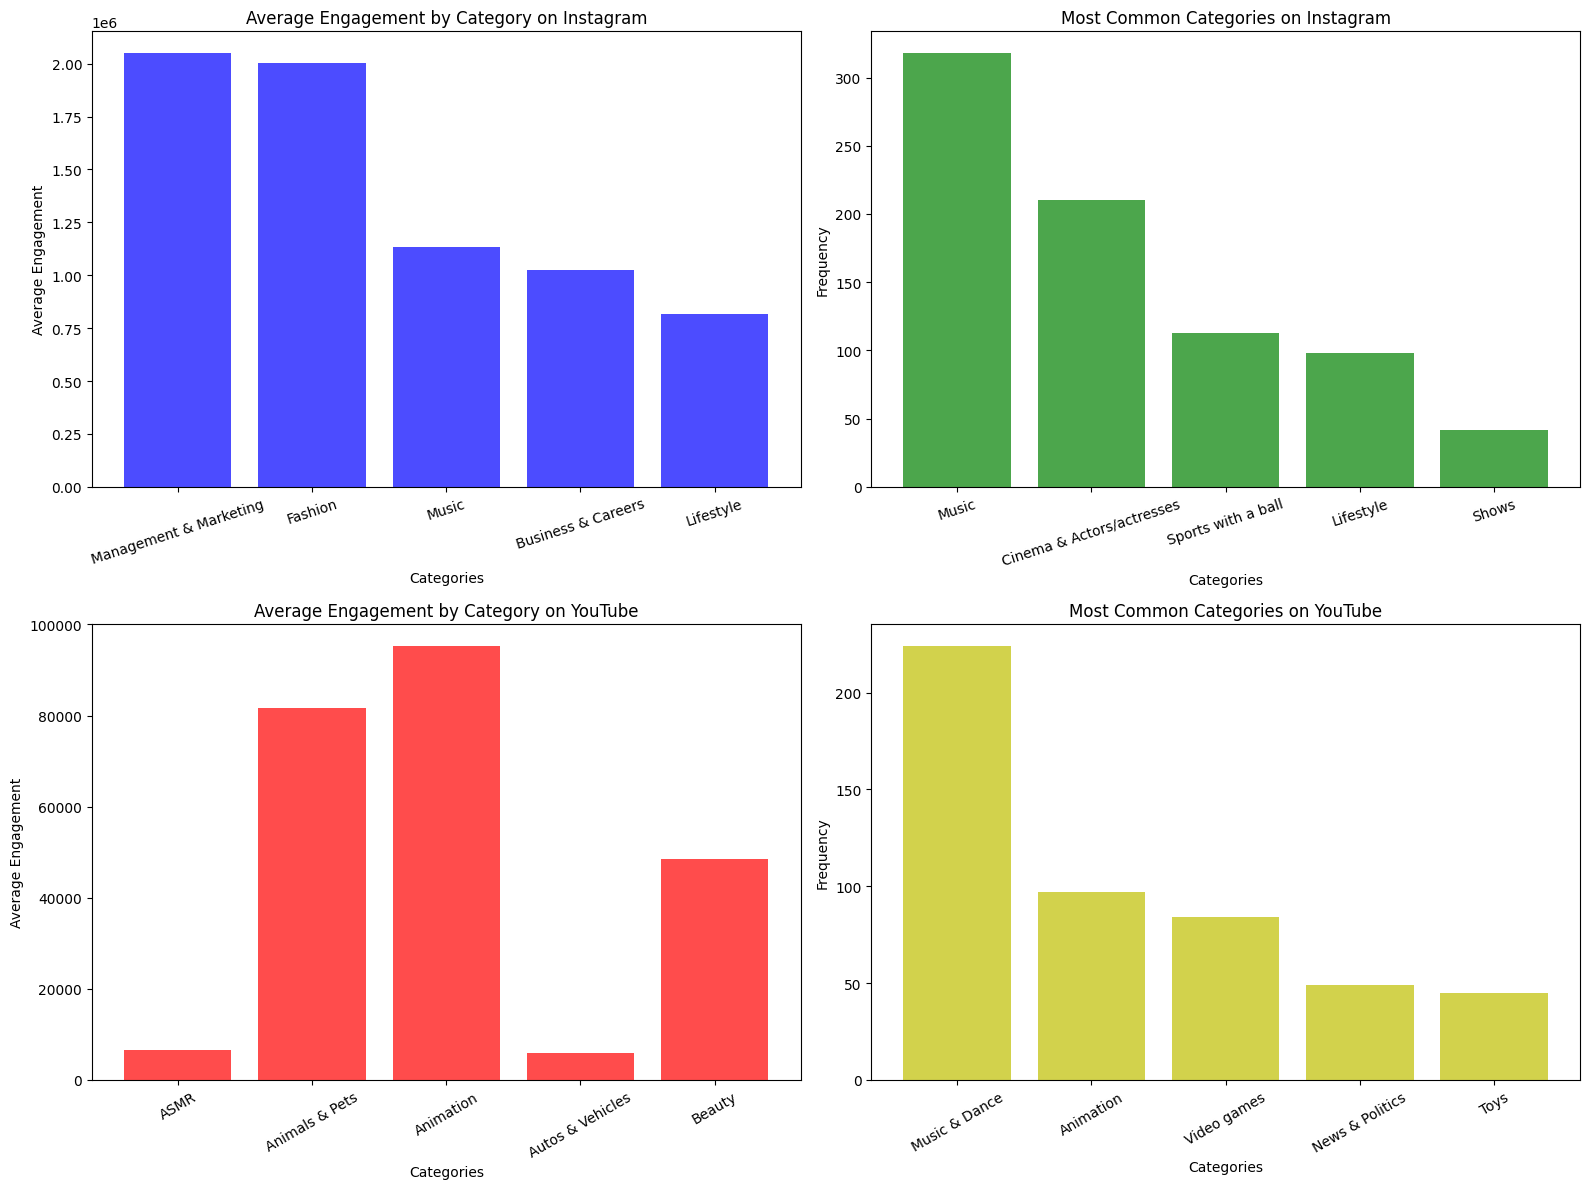

In [26]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Data for Average Engagement by Category on Instagram
categories_instagram_engagement = average_engagement_by_category_instagram.sort_values('Average Engagement', ascending=False)['Category'].head()
engagement_instagram = average_engagement_by_category_instagram.sort_values('Average Engagement', ascending=False)['Average Engagement'].head()

# Subplot 1: Average Engagement by Category on Instagram
axs[0, 0].bar(categories_instagram_engagement, engagement_instagram, color='b', alpha=0.7)
axs[0, 0].set_xlabel('Categories')
axs[0, 0].set_ylabel('Average Engagement')
axs[0, 0].set_title('Average Engagement by Category on Instagram')
axs[0, 0].tick_params(axis='x', rotation=18)

# Data for Most Common Categories on Instagram
categories_instagram_common = most_common_categories_instagram['Category'].head()
frequencies_instagram_common = most_common_categories_instagram['Frequency'].head()

# Subplot 2: Most Common Categories on Instagram
axs[0, 1].bar(categories_instagram_common, frequencies_instagram_common, color='g', alpha=0.7)
axs[0, 1].set_xlabel('Categories')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Most Common Categories on Instagram')
axs[0, 1].tick_params(axis='x', rotation=18)

# Data for Average Engagement by Category on YouTube
categories_youtube_engagement = average_engagement_by_category_youtube['Category'].head()
engagement_youtube = average_engagement_by_category_youtube['Average Engagement'].head()

# Subplot 3: Average Engagement by Category on YouTube
axs[1, 0].bar(categories_youtube_engagement, engagement_youtube, color='r', alpha=0.7)
axs[1, 0].set_xlabel('Categories')
axs[1, 0].set_ylabel('Average Engagement')
axs[1, 0].set_title('Average Engagement by Category on YouTube')
axs[1, 0].tick_params(axis='x', rotation=30)

# Data for Most Common Categories on YouTube
categories_youtube_common = most_common_categories_youtube['Category'].head()
frequencies_youtube_common = most_common_categories_youtube['Frequency'].head()

# Subplot 4: Most Common Categories on YouTube
axs[1, 1].bar(categories_youtube_common, frequencies_youtube_common, color='y', alpha=0.7)
axs[1, 1].set_xlabel('Categories')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Most Common Categories on YouTube')
axs[1, 1].tick_params(axis='x', rotation=30)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


When comparing the most common categories with the categories that have the highest average engagement, we can draw the following conclusions:

**Instagram:**

* The most common categories on Instagram include "Music," "Cinema & Actors/Actresses," "Sports with a ball," "Lifestyle," and "Shows."
* However, the categories with the highest average engagement on Instagram are "Management & Marketing" and "Fashion," which are not among the most common categories.

This suggests that while certain categories like "Music" and "Cinema & Actors/Actresses" are popular in terms of the number of influencers, they may not necessarily receive the highest average engagement per post. On the other hand, less common categories like "Management & Marketing" and "Fashion" tend to have a higher average engagement, indicating that content in these niches is particularly engaging for Instagram users.


**YouTube:**

* The most common categories on YouTube include "Music & Dance," "Animation," "Video games," "News & Politics," and "Toys."
* The categories with the highest average engagement on YouTube are "Travel" and "Design/Art."

In this case, there is a partial overlap between the most common categories and the categories with the highest average engagement. "Music & Dance" is a common category and may also have a high average engagement, although it was not included in the top 5.

Overall, these comparisons highlight the importance of considering both the popularity of a category (based on the number of influencers) and the average engagement it generates when planning influencer marketing campaigns. While common categories may have a larger pool of influencers, it's essential to evaluate their engagement metrics to determine the effectiveness of the campaign in reaching and engaging the target audience.

## Step 5: Audience Geography

To analyze the audience geography across all three platforms, we'll do the following steps:


1. **Data Aggregation:** Aggregate the data based on the country where the majority of the audience resides, summing the follower/subscriber counts.
2. **Data Visualization:** Create visualizations to better understand the geographic distribution of audiences.
3. **Insight Extraction:** Extract actionable insights from the aggregated and visualized data.

Let's start with data aggregation. We'll sum the follower counts for each country to get an idea of where the majority of the audience resides for influencers across Instagram, TikTok, and YouTube.


In [27]:
# Aggregate data based on the audience country
def aggregate_by_country(df, platform):
    country_agg = df.groupby('Audience Country').agg({'Followers': 'sum'}).reset_index()
    country_agg['Platform'] = platform
    return country_agg

yt.rename({'Subscribers':"Followers" },axis=1,inplace=True)

# Aggregate for each platform
instagram_country_agg = aggregate_by_country(insta, 'Instagram')
youtube_country_agg = aggregate_by_country(yt, 'YouTube')

# Combine the aggregated data
combined_country_agg = pd.concat([instagram_country_agg, youtube_country_agg])

# Sort by followers and show some data
combined_country_agg = combined_country_agg.sort_values(by=['Followers'], ascending=False).reset_index(drop=True)
combined_country_agg.head(10)

,Audience Country,Followers,Platform
0,United States,8.904300e+09,Instagram
1,India,5.381700e+09,Instagram
2,United States,4.937300e+09,YouTube
3,India,4.096600e+09,YouTube
4,Brazil,3.706500e+09,Instagram
5,Indonesia,2.159600e+09,Instagram
6,Brazil,1.413800e+09,YouTube
7,Mexico,1.019900e+09,YouTube
8,Mexico,8.047000e+08,Instagram
9,Spain,7.824000e+08,Instagram


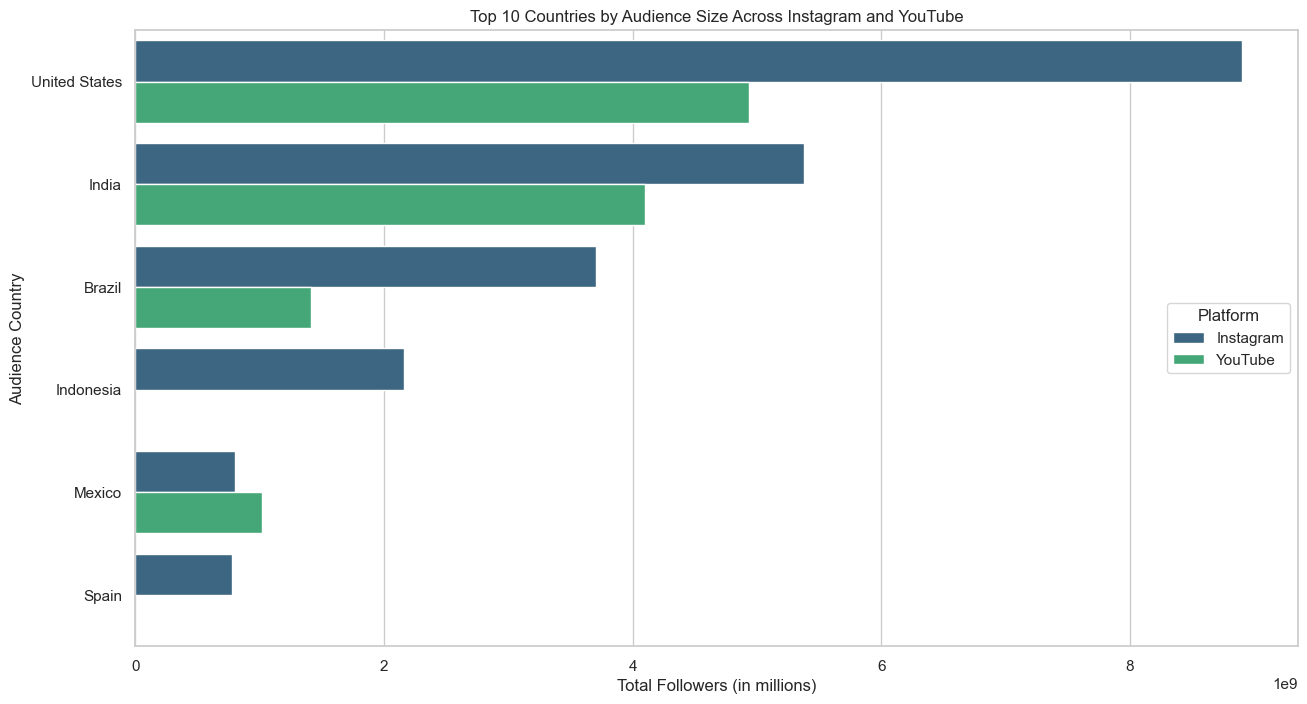

In [28]:
# Set up the aesthetics for the plots
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(15, 8))
sns.barplot(x='Followers', y='Audience Country', hue='Platform', data=combined_country_agg.head(10), palette='viridis')
plt.title('Top 10 Countries by Audience Size Across Instagram and YouTube')
plt.xlabel('Total Followers (in millions)')
plt.ylabel('Audience Country')
plt.legend(title='Platform')
plt.show()


The bar chart visualizes the top 10 countries by audience size across Instagram and YouTube. The countries are sorted by the total number of followers (in millions).

### Key Insights:
* **United States**: Dominates both Instagram and YouTube in terms of audience size.
* **India**: Also has a substantial audience on both platforms, though slightly less than the United States.
* **Brazil and Indonesia**: Have significant audiences on Instagram but are less prominent on YouTube in this dataset.


This information is useful for market segmentation and could guide businesses in tailoring their influencer marketing strategies according to the geographic distribution of potential customers.

Creating a geographical map is a great way to visualize the distribution of followers across different countries. Therefore, let's visualise with geographical maps.

/var/folders/c7/88624xv56d5drd2khbn_g4pm0000gn/T/ipykernel_19347/2350564008.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


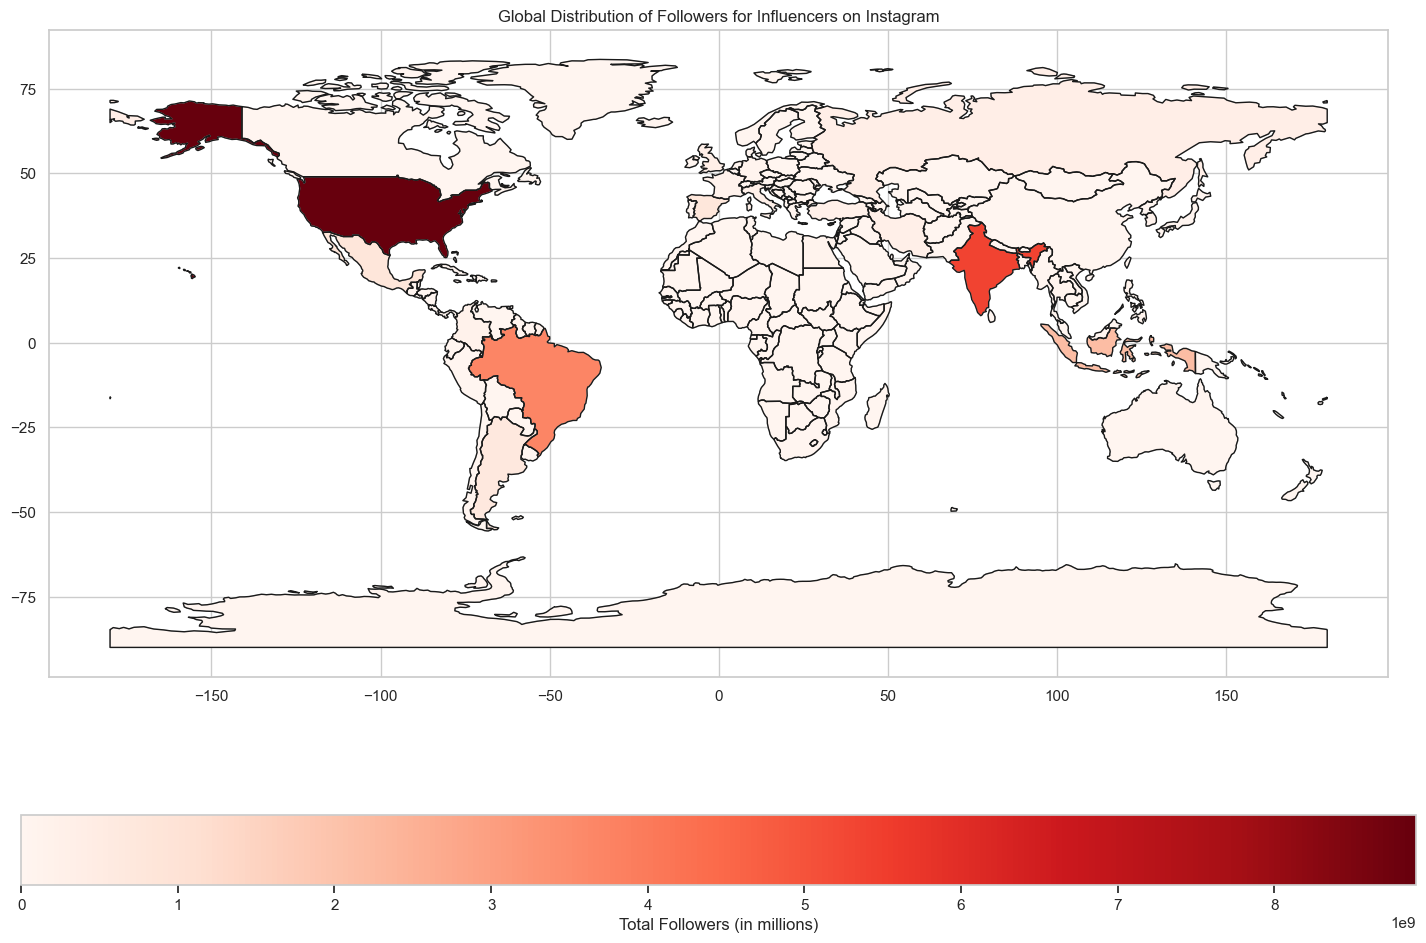

In [29]:
import geopandas as gpd
import matplotlib.colors as mcolors

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Standardize the country names in our datasets to match the GeoDataFrame
def standardize_country_names(df):
    df['Audience Country'] = df['Audience Country'].replace({'United States': 'United States of America', 'Singapore': 'Singapore'})
    return df

# Standardize country names in Instagram and YouTube datasets
instagram_country_agg = standardize_country_names(instagram_country_agg)
youtube_country_agg = standardize_country_names(youtube_country_agg)


# Merge world map and aggregated data
merged = world.set_index('name').join(instagram_country_agg.set_index('Audience Country'))




# Plotting
fig, ax = plt.subplots(1, figsize=(18, 12))
world.boundary.plot(ax=ax, linewidth=1, color='k')
merged['Followers'].fillna(0, inplace=True)
merged.plot(column='Followers', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, 
            legend_kwds={'label': "Total Followers (in millions)", 'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey"})
plt.title('Global Distribution of Followers for Influencers on Instagram')
plt.show()


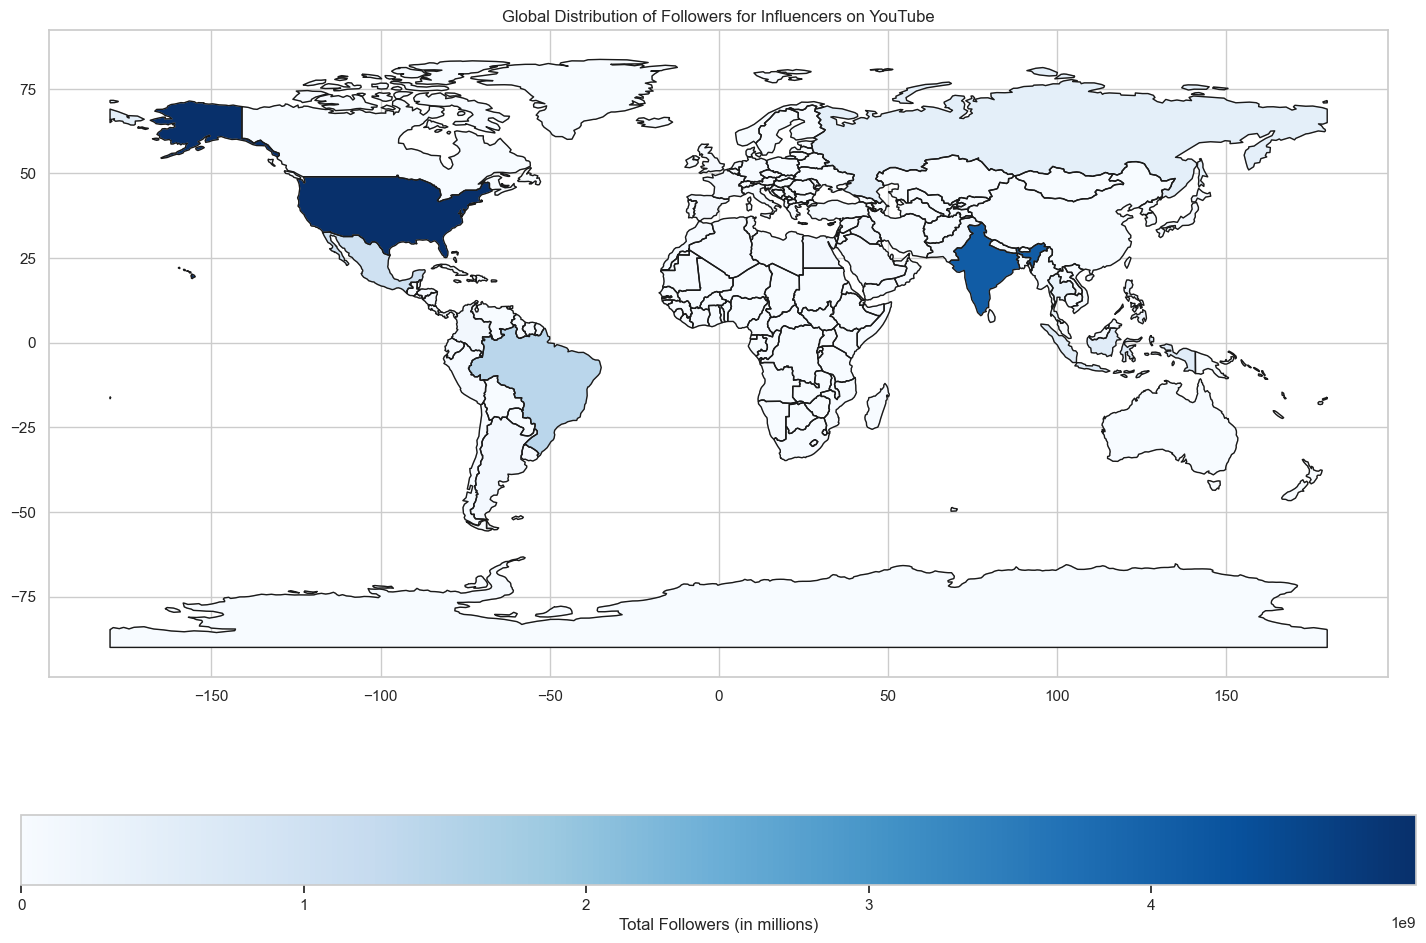

In [30]:
# Merge world map and aggregated data
merged = world.set_index('name').join(youtube_country_agg.set_index('Audience Country'))




# Plotting
fig, ax = plt.subplots(1, figsize=(18, 12))
world.boundary.plot(ax=ax, linewidth=1, color='k')
merged['Followers'].fillna(0, inplace=True)
merged.plot(column='Followers', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, 
            legend_kwds={'label': "Total Followers (in millions)", 'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey"})
plt.title('Global Distribution of Followers for Influencers on YouTube')
plt.show()

## Step 6: Matching Product Personality

Matching influencers with the right product personality is crucial for the success of any marketing campaign. To make effective recommendations, we'll take the following steps:

1. **Identify Product Personality**: Determine the attributes and qualities that define the product's personality (e.g., youthful, adventurous, elegant, etc.).

2. **Attribute Mapping**: Map these attributes to similar qualities or categories in the influencer dataset (e.g., a youthful product might align well with influencers in the "Fashion" or "Lifestyle" category).

3. **Engagement and Reach**: Consider influencers who not only match the product's personality but also have high engagement rates and a broad reach.

4. **Geographical Targeting**: Optionally, consider the geographical distribution of the influencer's audience if the product is targeted towards a specific location.


In [31]:
# Function to recommend influencers based on product personality and potential categories
def recommend_influencers(product_categories, platform_df, top_n=5):
    # Filter influencers based on the potential categories
    category_columns = [col for col in ['Category', 'category_2'] if col in platform_df.columns]
    filtered_df = platform_df[platform_df[category_columns].apply(lambda row: row.isin(product_categories).any(), axis=1)]
    
     
    # Sort by highest engagement (we'll use 'Engagement avg' for Instagram and 'avg likes' for YouTube)
    engagement_col = 'Engagement avg' if 'Engagement avg' in platform_df.columns else 'avg likes'
    filtered_df.loc[:,engagement_col] = pd.to_numeric(filtered_df[engagement_col], errors='coerce')
    sorted_df = filtered_df.sort_values(by=[engagement_col], ascending=False)
    
    # Select top N influencers
    top_influencers = sorted_df.head(top_n)
    return top_influencers

Let's check the categories that available in Instagram and Youtube

In [32]:
# Get unique categories from both Instagram and YouTube datasets
unique_categories_instagram = insta['Category'].dropna().unique().tolist() + insta['category_2'].dropna().unique().tolist()
unique_categories_youtube = yt['Category'].dropna().unique().tolist()


In [33]:
print("Instagram Categories")
print(unique_categories_instagram)
print("========\nYoutube Categories")
print(unique_categories_youtube)

Instagram Categories
['Sports with a ball', 'Music', 'Shows', 'Lifestyle', 'Humor & Fun & Happiness', 'Cinema & Actors/actresses', 'Clothing & Outfits', 'Fashion', 'Food & Cooking', 'Family', 'Fitness & Gym', 'Modeling', 'Computers & Gadgets', 'Beauty', 'Art/Artists', 'Finance & Economics', 'Cars & Motorbikes', 'Photography', 'Racing Sports', 'Literature & Journalism', 'Business & Careers', 'Animals', 'Nature & landscapes', 'Adult content', 'Accessories & Jewellery', 'Education', 'Management & Marketing', 'Luxury', 'Science', 'Kids & Toys', 'Cinema & Actors/actresses', 'Lifestyle', 'Shopping & Retail', 'Art/Artists', 'Literature & Journalism', 'Shows', 'Beauty', 'Music', 'Family', 'Photography', 'Humor & Fun & Happiness', 'Business & Careers', 'Fashion', 'Modeling', 'Luxury', 'Machinery & Technologies', 'Sports with a ball', 'Trainers & Coaches', 'Clothing & Outfits', 'Cars & Motorbikes', 'Adult content', 'Comics & sketches', 'Science', 'Kids & Toys', 'Fitness & Gym']
Youtube Categorie

In [34]:
# Define potential categories for 'Tech Gadgets' based on the unique categories in the datasets
tech_gadgets_categories_instagram = ['Computers & Gadgets', 'Machinery & Technologies', 'Science']
tech_gadgets_categories_youtube = ['Science & Technology', 'Autos & Vehicles']


In [35]:
# Recommend influencers for 'Tech Gadgets'
recommended_tech_gadgets_influencers = {
    'Instagram': recommend_influencers(tech_gadgets_categories_instagram, insta, top_n=5),
    'YouTube': recommend_influencers(tech_gadgets_categories_youtube, yt,top_n=5)
}

# Show recommended influencers for 'Tech Gadgets'
recommended_tech_gadgets_influencers['Instagram']

,Influencer insta name,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement,Engagement avg,Tier
274,elrubiuswtf,el rubius WTF,Computers & Gadgets,Cinema & Actors/actresses,16200000.0,Mexico,1.4M,1500000.0,Mega-Influencer
721,pewdiepie,PewDiePie,Computers & Gadgets,Cinema & Actors/actresses,21900000.0,United States,1.2M,1400000.0,Mega-Influencer
170,carryminati,𝑨𝒋𝒆𝒚 𝑵𝒂𝒈𝒂𝒓,Computers & Gadgets,Machinery & Technologies,15000000.0,India,885.8K,1000000.0,Mega-Influencer
657,nasa,NASA,Science,Photography,75300000.0,India,564.5K,653200.0,Mega-Influencer
331,grefg_official,TheGrefg,Computers & Gadgets,Machinery & Technologies,7100000.0,Spain,440.1K,546100.0,Mega-Influencer


### Top 3 Instagram Influencers for "Tech":


1. elrubiuswtf - Followers: 16.2 M, Audience Mostly in Mexico
2. pewdiepie - Followers: 21.9 M, Audience Mostly in USA
3. carryminati - Followers: 15 M, Audience Mostly in India

In [36]:
recommended_tech_gadgets_influencers['YouTube']

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments,Tier,Total Engagement
634,1veritasium,Veritasium,Science & Technology,11700000.0,United States,3.9M,169300.0,7800.0,Mega-Influencer,177100.0
349,MatthewPatrick13,The Game Theorists,Science & Technology,15700000.0,United States,3.1M,163800.0,8200.0,Mega-Influencer,172000.0
816,Mrwhosetheboss,Mrwhosetheboss,Science & Technology,10300000.0,United States,2.7M,152900.0,10100.0,Mega-Influencer,163000.0
355,marquesbrownlee,Marques Brownlee,Science & Technology,15500000.0,United States,2.9M,119200.0,6500.0,Mega-Influencer,125700.0
832,DalasReview,Dalas Review,Science & Technology,10100000.0,Mexico,684.7K,82100.0,9700.0,Mega-Influencer,91800.0


### Top 3 YouTube Influencers for "Tech":


1. MatthewPatrick13 - Followers: 15.7 M, Audience Mostly in USA
2. Mrwhosetheboss - Followers: 10.3 M, Audience Mostly in USA
3. marquesbrownlee - Followers: 10.1 M, Audience Mostly in USA